In [1]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_files
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import csv

In [2]:
data_1 = pd.read_csv('/home/shreevidya/Data/nox/combinedno2_cleaned.csv')

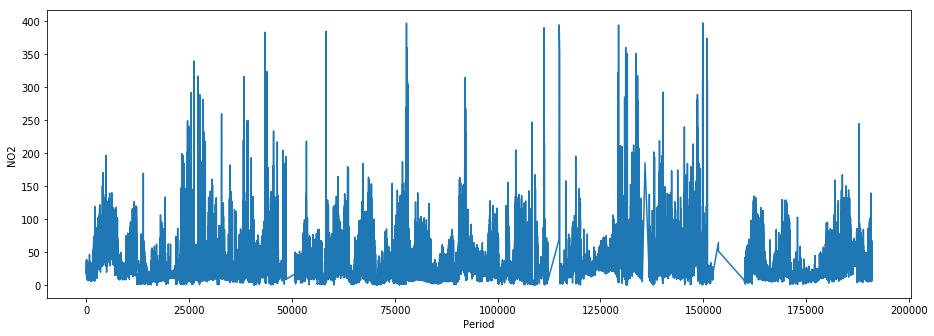

In [3]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([.5, .5, 2, 1]) # left, bottom, width, height (range 0 to 1)
data_1 = data_1[data_1['NO2'] < 400]
data_1 = data_1[data_1['NO2'] > 0]

plt.plot(data_1['NO2']) # 'r' is the color red
plt.xlabel('Period')
plt.ylabel('NO2')
#plt.title('String Title Here')
plt.show()

In [4]:
X = data_1['NO2']

In [5]:
train , test = X.values[:140000], X.values[140000:]

In [6]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/home/shreevidya/anaconda3/envs/tfv2/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
model = ARIMA(train, order=(3, 1, 5))
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

In [8]:
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)

In [9]:
for i in range(10):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

predicted=52.280045, expected=54.940000
predicted=56.875653, expected=53.320000
predicted=42.625554, expected=53.820000
predicted=52.361884, expected=70.060000
predicted=90.322777, expected=79.540000
predicted=76.862815, expected=67.260000
predicted=36.789122, expected=65.290000
predicted=67.311072, expected=55.030000
predicted=37.104320, expected=32.310000
predicted=2.808404, expected=20.200000


In [12]:
error = sqrt(mean_squared_error(test, predictions))
print('Test MSE: %.3f' % error)

NameError: name 'sqrt' is not defined

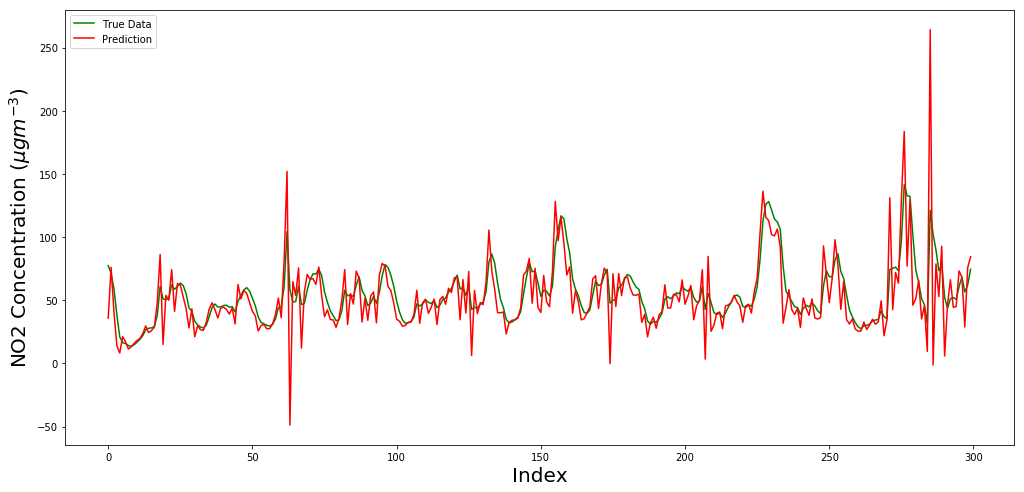

In [11]:
fig, ax = plt.subplots(figsize=(17,8))
#ax.set_title('Prediction vs. Actual after 100 epochs of training')
ax.plot(test[100:400,], label='True Data', color='green')
ax.plot(predictions[101:401], label='Prediction', color='red')
plt.xlabel("Index", fontsize=20)
plt.ylabel("NO2 Concentration $(\mu gm^{-3})$", fontsize=20)
plt.legend()
plt.savefig("arima_no2.pdf")
plt.show()